<a href="https://colab.research.google.com/github/momoh127/EC414-MachineLearningWork/blob/main/EC414HW7_Fall24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Due wednesday 20th of November, 2024

In [ ]:
import random
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import cdist


## Question 1: Ellipses(15 points)

Consider an ellipsoid determined by a symmetric positive semi-definite (PSD) matrix
𝑀
in
𝑅^𝑑



###Question 1.a
Write the equation that defines the ellipsoid in terms of the vector
𝑥
and the matrix
𝑀
.


x^T M x = 1

###Question 1.b
Describe the process of eigendecomposition of the matrix
𝑀
. Specifically, if
𝑀
 can be expressed as:

M=$\frac{1}{N} \sum_{i=1}^d λ_i v_i v_i^T$

what do
$\ λ_i$ and $\ v_i$
  represent in this context?

  $\ λ_i$: The eigenvalues of the matrix  M . These represent the scaling factors along the principal axes of the ellipsoid

  $\ v_i$: The eigenvectors of  M . These represent the directions of the principal axes of the ellipsoid

###Question 1.c
Explain the significance of the covariance ellipsoid in statistics. How do the eigenvectors and eigenvalues of
𝑀 relate to the geometry of the ellipsoid?

The covariance ellipsoid is significant in statistics because it represents the spread of data points in multidimensional space.

$\ λ_i$: Represent the squared lengths of the semi-axes of the ellipsoid and larger eigenvalues correspond to greater variance along the associated eigenvector direction, while smaller eigenvalues correspond to less variance.

$\ v_i$: Represent the directions of the principal axes of the ellipsoid and each eigenvector indicates a major direction of variance in the data.

### **Question 2:** Implementing k-means++ (10pts)


In order to avoid errors due to a bad initialization, k-means++ introduces a smarter method of initialization to avoid local minima. It does so by first assigning one centroid to be a random datapoint, and assigning each subsequent centroid as the point with the maximum distance from the previous centroids.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(10)

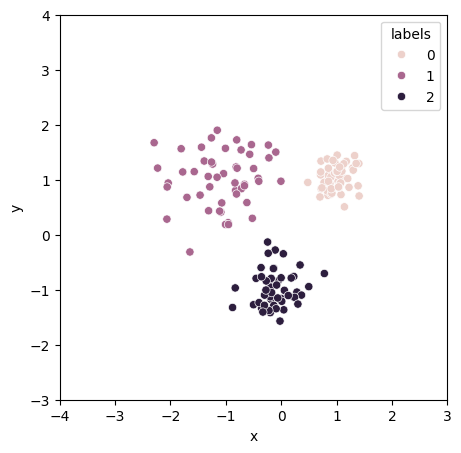

In [ ]:
# Do NOT change change this cell just run it
rng = np.random.default_rng(0)

# Generate 2D Gaussian Data with 3 clusters of 3 different means and Covariance
n_per_cluster = 50
xy1 = rng.multivariate_normal([1,1], [[0.05,0],[0,0.05]], n_per_cluster)
xy2 = rng.multivariate_normal([-1,1], [[0.3,0],[0,0.3]], n_per_cluster)
xy3 = rng.multivariate_normal([0,-1], [[0.08,0],[0,0.08]], n_per_cluster)

DATA = np.concatenate((xy1, xy2, xy3), axis=0)
DATA_labels = np.zeros(3*n_per_cluster, np.uint8)
DATA_labels[n_per_cluster:2*n_per_cluster] = 1
DATA_labels[2*n_per_cluster:] = 2


def scatter_by_category(X, labels, m=None):


    plt.figure(figsize=(5,5))
    plt.xlim([-4, 3])
    plt.ylim([-3, 4])
    df = pd.DataFrame({'x':X[:, 0], 'y':X[:, 1], 'labels':labels})
    sns.scatterplot(x='x', y='y', data=df, hue='labels')
    if m is not None: plt.scatter(m[:, 0], m[:, 1], color='r', linewidths=2)
    plt.show()

scatter_by_category(DATA, DATA_labels)

In [ ]:
# Do NOT change change this cell just run it

def initKRandomCentroids(k, trainingSet):
    indices = random.sample(range(0, trainingSet.shape[0]), k)
    initial_centroids = trainingSet[indices]

    return initial_centroids


In [ ]:
# Do NOT change change this cell just run it

def newCentroid(dictionary):

    temp = list()
    for index, data in dictionary.items():
        newCentroid = np.mean(data, axis=0)
        temp.append(newCentroid)

    centroids = np.stack(temp, axis=0)
    return centroids

In [ ]:
# Do NOT change change this cell just run it
dummy_dict = {0: np.arange(0, 9).reshape(-1, 3),
              1: np.arange(0, 12).reshape(-1, 3),
              2: np.arange(0,6).reshape(-1,3),
              3: np.arange(0,6).reshape(-1,3)}
newCentroid(dummy_dict)

array([[3. , 4. , 5. ],
       [4.5, 5.5, 6.5],
       [1.5, 2.5, 3.5],
       [1.5, 2.5, 3.5]])

In [ ]:
# Do NOT change change this cell just run it

def get_objective(dictionary, centroids):
    obj_val = 0
    for (_ , data), m in zip(dictionary.items(),centroids):
        m = m.reshape(1, -1)
        obj_val += np.sum(np.linalg.norm((data - m), axis = 1)**2)
    return obj_val


In [ ]:
# Do NOT change change this cell just run it

def kmeans(k, trainSet, max_iter, plot = False, init_func=initKRandomCentroids):

    ### initialize cluster dictionary:
    clusters = {}

    ### initialize a list to store objective function values:
    obj_val = list()

    ### initialize k centroids:
    ### WRITE CODE HERE:
    centroids = init_func(k, trainSet)

    ### (1) assign data to each clusters, (2) update centroids, (3)record objective function values,
    ### (4) plot a scatter plot of trainSet colored with their clustering labels superposed with cluster means when `plot = True`
    ###  at each iteration:. Note: Do confuse with `DATA_labels` created in part (a), `DATA_labels` should not be used apart from part (a).
    ### WRITE CODE HERE:
    for t in range(max_iter):

        ### initialize a distance record for to each centroids (n, k)
        dist = np.zeros((trainSet.shape[0], k))

        ### iterate over each centroids:
        for i in range(0, k):
          m = centroids[i].reshape(1, -1)
          dist[:, i] = np.linalg.norm((trainSet - m), axis = 1)**2

        ### pick the miminum distance for each data and put it to cluster dictionary
        assignment = np.argmin(dist, axis = 1)
        for i in range(0,k):
            clusters[i] = trainSet[assignment == i]

        ### compute objective function value:
        obj_val.append(get_objective(clusters, centroids))

        if plot:
            scatter_by_category(trainSet, assignment, centroids)
        ### update centroids
        centroids = newCentroid(clusters)



    return centroids, clusters, obj_val

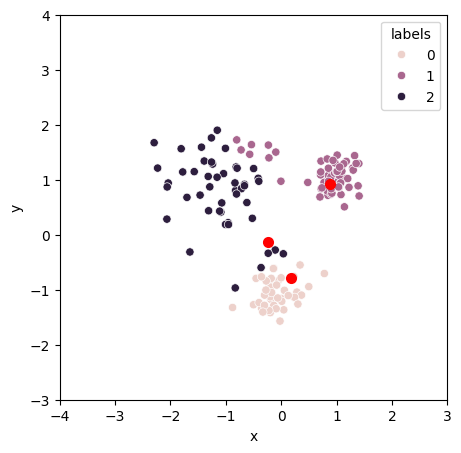

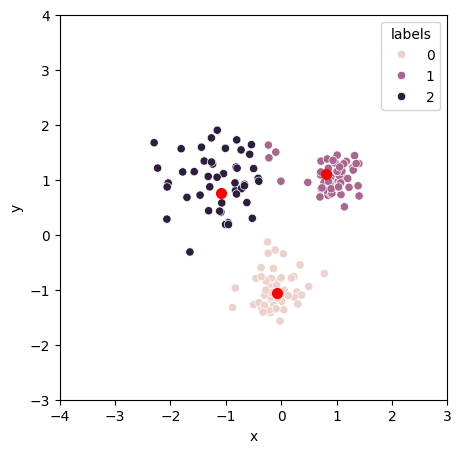

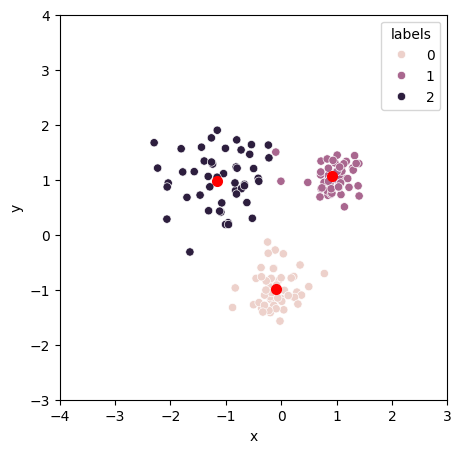

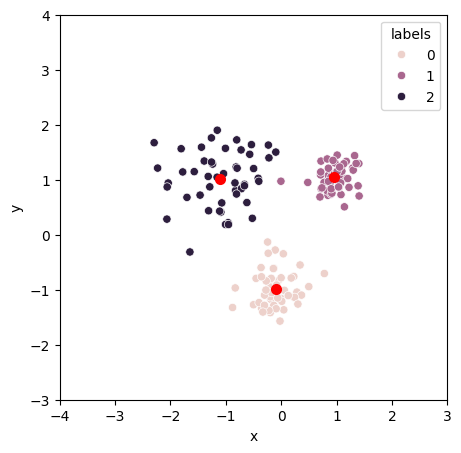

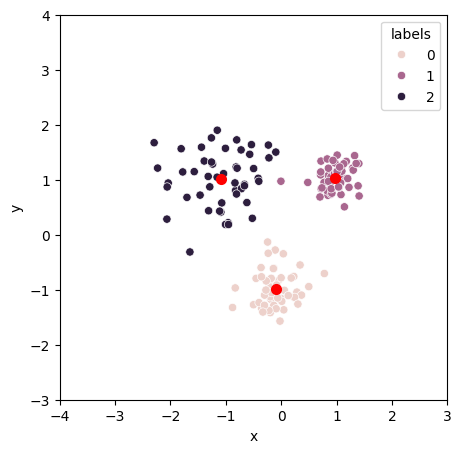

In [ ]:
# Do NOT change change this cell just run it

centroids, clusters, obj_val = kmeans(3, DATA, max_iter = 5, plot = True, init_func=initKRandomCentroids)

Text(0, 0.5, '$J^{(t)}$')

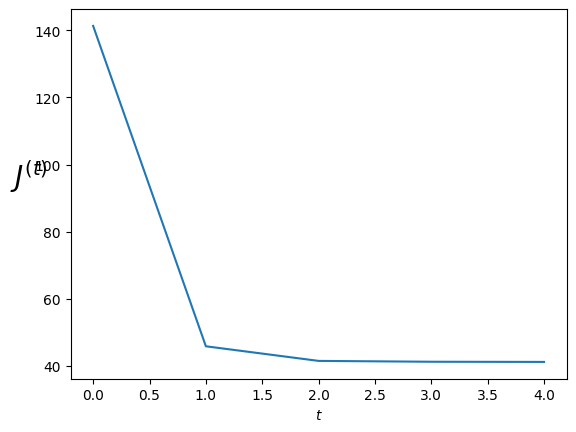

In [ ]:
# Do NOT change change this cell just run it
plt.plot(list(range(len(obj_val))), obj_val)
plt.xlabel(r'$t$')
plt.ylabel(r'$J^{(t)}$', rotation=0, fontsize=20)

Text(0, 0.5, '$J^{(t)}$')

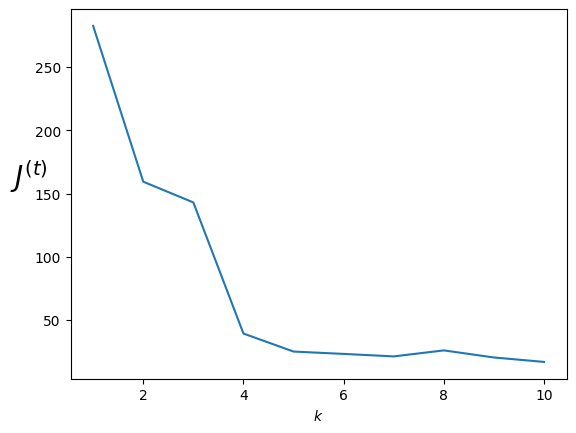

In [ ]:
# Do NOT change change this cell just run it

def elbow_method(max_k, trainSet, max_iter, plot, init_func):

  obj_vals = []
  for k in range(1,max_k+1):
    centroids, clusters, obj_val = kmeans(k, trainSet, max_iter, plot, init_func=init_func)
    obj_vals = np.append(obj_vals, obj_val[-1])
  return obj_vals


max_k = 10
obj_vals = elbow_method(max_k, DATA, max_iter=5, plot=False, init_func=initKRandomCentroids)
plt.plot(list(range(1,max_k+1)), obj_vals)
plt.xlabel(r'$k$')
plt.ylabel(r'$J^{(t)}$', rotation=0, fontsize=20)

####2.a (6pts) New Initialization Function

Complete the following function with the new k-means++ initialization method. The first centroid should be initialized to be a random point in the trainSet. For the rest,

In [ ]:
# initialization algorithm
def initialize_kmeanspp(k, trainSet):
    '''
    A function that initializes k centroids using the kmeans++ randomized algorithm.
    arguments:
        k - number of clusters
        trainSet - numpy array of data points shape (n, d)

    returns:
      shape (k, d) numpy array of centroid
    '''

    #initialize the first centroid as a random data point
    #compute the remaining centroids
    #at each iteration, find squared the distance of each point to each previous centroid and store the minimum of those distances, and choose a new point at random where x_i is chosen with probability proportional to the distance
    ### ADD CODE HERE

    ### END OF STUDENT CODE
    n, d = trainSet.shape
    centroids = np.zeros((k, d))

    centroids[0] = trainSet[np.random.randint(0, n)]

    for i in range(1, k):
        dist_sq = np.min([np.sum((trainSet - centroids[j])**2, axis=1) for j in range(i)], axis=0)


        probs = dist_sq / np.sum(dist_sq)
        next_centroid_idx = np.random.choice(np.arange(n), p=probs)
        centroids[i] = trainSet[next_centroid_idx]

    return centroids



####2.b Test the k-means++ algorithm

Now, change the initialization function of kmeans to call your new initialization function to run the k-means++ algorithm.

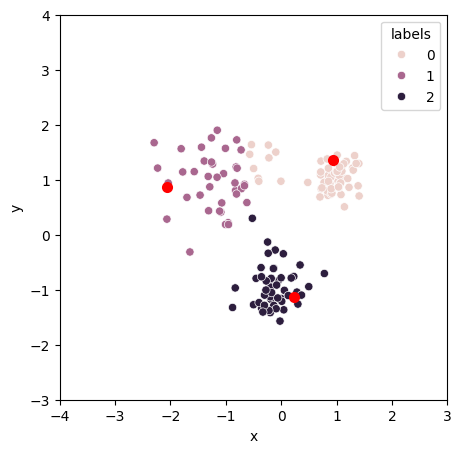

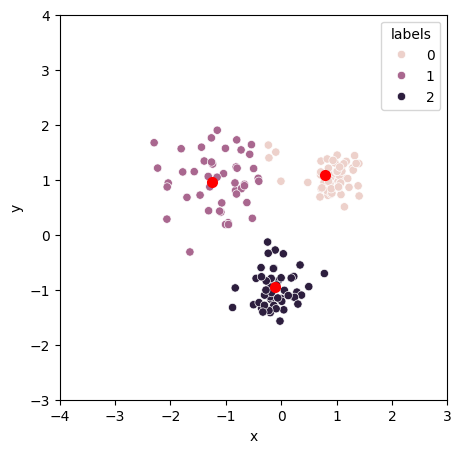

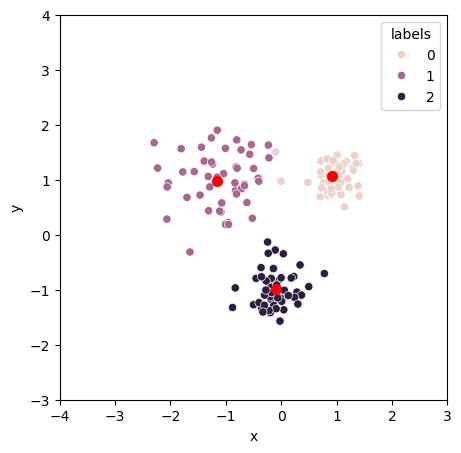

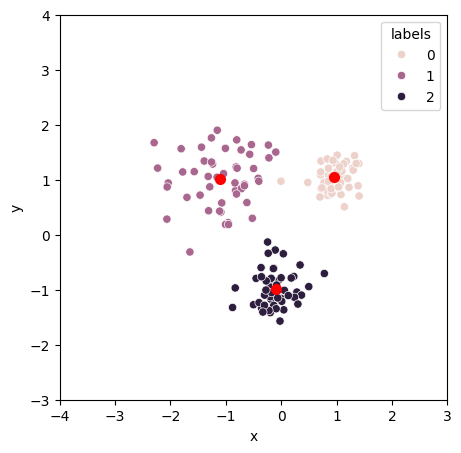

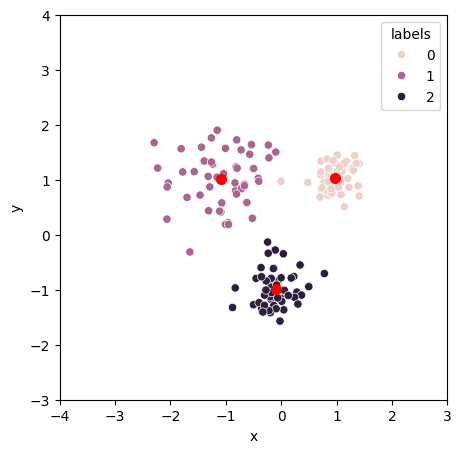

In [ ]:
centroids, clusters, obj_val = kmeans(3, DATA, max_iter =5, plot = True, init_func=initialize_kmeanspp)

####2.c (4pts) Does the k-means++ algorithm work better? Run the algorithm a few times. Does it have a better initialization? Is it guaranteed to have a better initialization?

Yes, the k-means++ algorithm generally works better than random initialization. It is designed to spread out the initial centroids, which reduces the likelihood of poor clustering results


## Question 3: Learning to play Blackjack(60 points)




Blackjack is a card game played against a "dealer". The full rules, including various betting rules we will not use, are available online here: https://bicyclecards.com/how-to-play/blackjack/

The object of the game is to collect a hand of cards whose point total is as close to 21 as possible *WITHOUT* going over. If your point total is over 21, then the dealer automatically wins. A hand of cards is scored as follows:

Each card is worth a certain number of points. For a card specified by a `(value, suit)` tuple,
the number of points it is worth is completely determined by the  `value` term in the tuple (`suit` is irrelevant).

* If `value` is a number "2" through "10", then the card is worth that number of  points.
* If `value` is "Jack", "Queen" or "King", then the card is worth 10 points.
* If `value` is "Ace", then the card is worth EITHER 1 point or 11 points - the player may choose.

The total score of a hand is the total number of points for all cards in the hand, counting each Ace in whichever manner (either 11 or 1) the player chooses.

At the start of the game, you are dealt two cards, and the dealer is dealt  1 card that is visible to you. You may take one of  two actions: a "HIT" or  a "STAY". If you take the "HIT" action, you will be given another card. Getting another card will increase your score, but might also make your score go over 21. If you take the "STAY" action, this  indicates that you  are satisfied  with  your current point total (i.e. you suspect that taking another card might make your score go over  21, or that the dealer will not able to beat your  score without  going over 21 themselves). Not that you may adjust your decision to count an Ace as 1 point  or 11 points at  any  time. So, for  example, if you hand consists of a 9 of clubs and an Ace of spades, you might count the Ace as 11 points for a total of 20 points. However, if you then take the "HIT" action (which is very inadvisable in this case!), you might  be dealt an 8 of hearts, in which case your  total would be  either 28 (counting the Ace as 11)  or 18  (counting  the Ace as 1). So, you could now count the Ace as 1 point and choose the  "STAY" action, to indicate that you are no longer interested in taking another car.

If you take the "HIT" action, then you are dealt a card and again have the option to either take a "HIT" or "STAY" action. You may continue taking the "HIT" action and getting cards until your total is over 21 no matter how you choose to count the Aces. If this happens, then your hand is called "bust" and you automatically lose. So, you should try to choose  the "STAY" action before this occurs.

If you take the "STAY" action, then the dealer will start playing their hand.  The dealer is not allowed to strategize: the  dealer will continually take  the  "HIT" action until their hand is worth 17 points or more. Once that happens, the dealer takes the "STAY" action. The dealer must count Aces as  11 points unless counting the Ace this  way would  cause the  dealer's score to go  over 21.

Outcome of the game:

If you go bust, you automatically lose. If you do  not go bust,  but the dealer  does, then you win. If neither of you go bust, then the person with the  highest score  wins. Otherwise, it is a tie.


Note that the player gets to see the  first card that  the dealer is dealt, but NOT any of the other cards that the dealer will take when making their decisions.


### Reward Structure
To fit this game into the reinforcement learning framework, we need to decide on what rewards to give the  player. We give rewards in the following way:

* If the player takes an action that results in a loss (either "STAY" and then losing after the dealer finishes playing, or "HIT" and going bust), then the  reward is -1.

* If the player takes an action that results in a win (i.e. a "STAY" followed by the dealer either going bust or  having a smaller score than the  player), then the reward is 1.

* If the player takes an action that results in a tie (i.e. a "STAY" followed by the dealer achieving the same score as the player), then the reward is 0.

* If the player takes  an action that does  not result in  the game ending (that is, a "HIT" with the possibility of taking another "HIT"), then the reward is 0.

## Action Structure

The  set of actions  available to the  player  is always either both "HIT" and "STAY", or nothing at all (which happens after taking the "STAY" action, or going  bust), both of which result in entering a terminal state, as the dealer will play out their hand and the player will take no more actions.


In the first part of this question, you will finish a missing part of a Blackjack simulator, and then implement a function that converts the "full" state of the blackjack game (which includes the complete card identity of all cards in the players hand) into  a "minimal" state that contains just the critical information needed by your reinforcement learning agent to play the game optimally.



In [ ]:
# Two helpful functions for running a blackjack game.

def draw_card():
  '''
  returns a randomly selected (value, suit) tuple representing a random card.
  Assumes cards are drawn from infinitely many decks shuffled together (so
  your agent cannot gain an advantage by counting cards in this game).
  '''
  value = random.choice(['Ace'] + [str(i) for i in range(2,11)] + ['Jack', 'Queen', 'King'])
  suit = random.choice(['Clubs', 'Hearts', 'Spades', 'Diamonds'])

  return (value, suit)

def hand_to_str(hand):
  '''
  Returns a string containing a human-readable description of a blackjack hand.
  Note this function returns a string, it does not call `print`.
  '''
  def card_to_str(c):
    value, suit = c
    return value + ' of ' + suit
  return ', '.join([card_to_str(c) for c in hand])

## Question 3.a (10 pts)

Implement the function `score_hand` below. See the doc-string for arguments and return value specifications.

In [ ]:
def score_hand(hand):
  '''
  returns the best possible score for a given hand.

  You can read the full scoring rules below, and also at this link https://bicyclecards.com/how-to-play/blackjack/ under "Card Values/scoring".

  The rules for scoring are:
  Each card is worth a certain number of points. For a card specified by a (value, suit) tuple,
  the number of points it is worth is completely determined by the  "value" term in the tuple (suit is irrelevant).
  If the value term is a number 2 through 10, then the card is worth that number of  points.
  If the value is "Jack", "Queen" or "King", then the card is worth 10 points.
  If the value is "Ace", then the card is worth EITHER 1 point or 11 points - the player may choose.

  The total score of a hand is the total number of points for all cards in the hand, counting each Ace in whatever manner
  the player chooses.
  The objective of the game is to  have as high as score as possible WITHOUT going over 21. So a score of 21 is a "perfect" score,
  a score of 20 is a very good score, and a score of 22 is very bad score (if you go over 21 you automatically lose).

  arguments:
    hand: a list of (value, suit) pairs specifying the hand of the player.
        both "value" and "suit" are represented by strings.
  return two values:
    (score, eleven_valued_aces)

    score: a non-negative integer representing either:
      1. The highest score possible with this hand that is less than or equal to 21. Multiple scores  might be  possible  if the  hand
        contains one or more  Aces. You  must find the  largest score that is less than or equal to 21 if such a thing exists.
      2. If it is impossible for this hand to score less than or equal to 21 (the hand is called "bust" in this case),
        then return the lowest possible score for the hand (which must necessarily be >21).

    eleven_valued_aces: the number of aces in the hand that were scored at 11 points rather than 1 point
      in order to achieve the score provided in the first return value (these are also called "soft" aces).
    '''

  ## Your Code Here
  total_score = 0
  aces = 0
  eleven_valued_aces = 0

  for value, suit in hand:
      if value in ["Jack", "Queen", "King"]:
          total_score += 10
      elif value == "Ace":
          aces += 1
      else:
          total_score += int(value)

  while aces > 0:
      if total_score + 11 <= 21:
          total_score += 11
          eleven_valued_aces += 1
      else:
          total_score += 1
      aces -= 1

  return total_score, eleven_valued_aces



In [ ]:
test_cases = {
  (('Ace', 'Clubs'),): (11, 1),
  (('Ace', 'Hearts'), ('Ace', 'Spades'),): (12, 1),
  (('8', 'Clubs'), ('King', 'Diamonds'), ('9', 'Spades'),): (27, 0),
  (('Ace', 'Hearts'), ('7', 'Diamonds'), ('Ace', 'Clubs'), ('King', 'Diamonds'),): (19, 0),
  (('10', 'Spades'),): (10, 0),
  (('King', 'Spades'), ('Ace', 'Clubs'),): (21, 1),
  (('Ace', 'Hearts'), ('7', 'Diamonds'), ('10', 'Diamonds'),): (18, 0),
  (('10', 'Clubs'), ('4', 'Hearts'), ('Ace', 'Spades'), ('8', 'Spades'),): (23, 0),
  (('4', 'Clubs'), ('7', 'Hearts'), ('Ace', 'Spades'), ('2', 'Clubs'), ('King', 'Diamonds'),): (24, 0),
  (('2', 'Hearts'), ('5', 'Hearts'), ('2', 'Hearts'), ('3', 'Hearts'), ('3', 'Diamonds'), ('King', 'Spades'),): (25, 0),
  (('10', 'Clubs'),): (10, 0),
  (('King', 'Hearts'), ('Ace', 'Spades'),): (21, 1),
  (('4', 'Spades'), ('5', 'Diamonds'), ('3', 'Hearts'),): (12, 0),
  (('4', 'Diamonds'), ('8', 'Hearts'), ('4', 'Spades'), ('6', 'Diamonds'),): (22, 0),
  (('Jack', 'Spades'),): (10, 0),
  (('10', 'Diamonds'), ('7', 'Clubs'),): (17, 0),
  (('Jack', 'Hearts'), ('6', 'Clubs'), ('6', 'Spades'),): (22, 0),
  (('2', 'Diamonds'), ('Ace', 'Spades'), ('8', 'Spades'), ('7', 'Spades'),): (18, 0),
  (('King', 'Clubs'),): (10, 0),
  (('Ace', 'Hearts'), ('Jack', 'Diamonds'),): (21, 1),
  (('4', 'Clubs'), ('2', 'Diamonds'), ('4', 'Spades'),): (10, 0),
  (('King', 'Spades'), ('10', 'Hearts'), ('2', 'Clubs'), ('5', 'Spades'),): (27, 0),
  (('Queen', 'Hearts'),): (10, 0),
}

def test_score_hand():
  for hand, true_output in test_cases.items():
    output = score_hand(list(hand))
    assert output == true_output, f"incorrect output on test case: {hand}. Expected output: {true_output}, computed output: {output}"
  print("all tests pass :)")


## Run the following cell to test your implemention of  Q3.a.

In [ ]:
test_score_hand()

all tests pass :)


The following cell contains the blackjack game code. You don't need to modify it, but you're welcome to read it to see how it works.

In [ ]:
class BlackjackSimulator:
    '''
    This class simulates a (slightly simplified) version of the card game Blackjack.

    The player's current hand is accessible via the `player_hand` attribute.
    The dealer's current hand is accessible via the `dealer_hand` attribute.

    Both hands are stored as lists of cards, where each card is a tuple (value, suit) as
    returned by `draw_card()`.

    The actions currently available to the player are accessible via the `available_actions` attribute.
    The last reward earned by the player is accessible via the `reward` attribute.

    See the rules of blackjack here: https://bicyclecards.com/how-to-play/blackjack/

    We do not play with "naturals" here as they do not require any decision-making.
    This makes the odds a little worse than they should be, so your agent
    would actually do slightly better in a casino than in this simulator.
    '''

    def __init__(self):
        self.player_hand = [draw_card(), draw_card()]

        self.dealer_hand = [draw_card()]

        self.available_actions = ['HIT', 'STAY']

        self.reward = 0

    def is_game_over(self):
        '''
        Check if the game is over. If it is, `self.reward` holds the result of the game:
        - 0 for a tie
        - 1 for a player win
        - -1 for a player loss
        '''
        return len(self.available_actions) == 0

    def player_hand_str(self):
        '''
        Return a string representation of the player's hand.
        '''
        return hand_to_str(self.player_hand)

    def dealer_hand_str(self):
        '''
        Return a string representation of the dealer's hand.
        '''
        return hand_to_str(self.dealer_hand)

    def get_reward(self):
        '''
        Get the current reward for the game's state.
        '''
        self.reward = self._get_reward()
        return self.reward

    def _get_reward(self):
        '''
        Helper function to calculate the reward for the current game state.
        '''
        if len(self.available_actions) != 0:
            return 0

        dealer_score = self.dealer_score()
        player_score = self.player_score()

        if player_score > 21:
            return -1
        if dealer_score > 21:
            return 1
        if player_score > dealer_score:
            return 1
        if player_score == dealer_score:
            return 0
        return -1

    def player_score(self):
        '''
        Calculate and return the player's hand score.
        '''
        return score_hand(self.player_hand)[0]

    def dealer_score(self):
        '''
        Calculate and return the dealer's hand score.
        '''
        return score_hand(self.dealer_hand)[0]

    def take_action(self, action: str):
        '''
        Simulate a player's turn by taking a specified action.

        Arguments:
            action: A string, either "HIT" or "STAY".

        Returns:
            An integer reward for the action taken.
        '''
        assert action in self.available_actions, (
            f"Invalid action: {action}. Available actions: {self.available_actions}."
            f" Current hand: {self.player_hand_str()}."
        )

        if action == 'STAY':
            self.available_actions = []
            while self.dealer_score() < 17:
                self.dealer_hand.append(draw_card())
        elif action == 'HIT':
            self.player_hand.append(draw_card())
            if self.player_score() > 21:
                self.available_actions = []

        return self.get_reward()

In [ ]:
## This cell contains some helper functions that print the current state of the
# blackjack game in a human-readable way, as well as allow you to test the blackjack
# simulator by playing with it yourself.


def print_status(bs):
  print(f"Current Total: {bs.player_score()}\nCurrent hand: {bs.player_hand_str()}")
  print(f"Dealer Total: {bs.dealer_score()}\nDealer hand: {bs.dealer_hand_str()}")
  if len(bs.available_actions) == 0:
    if bs.get_reward() == 0:
      print(f"It's a tie!")
    elif bs.get_reward() == 1:
      print(f"Player Wins!")
    elif bs.get_reward() == -1:
      print(f"Player loses!")
    return False
  else:
    return True

def play_blackjack():
  bs = BlackjackSimulator()

  def get_action():
    action = None
    options = bs.available_actions
    while action not in options:
      if  action is not None:
        print(f"{action} is not an allowed action. Please select again.")
      print("Available Actions:")
      for option in options:
        print(f"* {option}")
      action = input("Your selection: ").upper()
    return action

  print_status(bs)
  while not bs.is_game_over():
    action = get_action()
    bs.take_action(action)
    print_status(bs)


If you want, uncomment the following cell and run it to play blackjack yourself. You won't be graded on its output.

In [ ]:
## Who needs artificial intelligence, we have natural intelligence: fully organic and free-range!
# play_blackjack()

## Question  3.b (10pts)
Implement `get_state` below. This function captures the minimal information needed by an agent to make an optimal decision about what action to take. As specified in the docstring, the input should be a BlackjackSimulator object as defined above. You need to extract from this object a tuple: `(player_score, player_eleven_valued_aces, dealer_score, dealer_eleven_valued_aces)` where `player_score` is the current score of the player, `player_eleven_valued_aces` is the current number of aces the player is counting as 11 points rather than 1 point, and similarly for the `dealer_*` variables. As specified in the docstring of the `BlackjackSimulator` class, the player and dealer hands are accessible via `sim.player_hand` and `sim.dealer_hand`.

In [ ]:
def get_state(sim: BlackjackSimulator):
  '''
  find the score and number of aces values at 11 points rather than 1 point in both the player and dealer's hands (aka "soft aces").

  arguments:
    sim: a BlackjackSimulator object.

  returns:
     a tuple (player_score, player_eleven_valued_aces, dealer_score, dealer_eleven_valued_aces)
  '''

  # YOUR CODE HERE
  player_score, player_eleven_valued_aces = score_hand(sim.player_hand)
  dealer_score, dealer_eleven_valued_aces = score_hand(sim.dealer_hand)

  return player_score, player_eleven_valued_aces, dealer_score, dealer_eleven_valued_aces

In [ ]:
# Argument checking functions that are useful for making sure your implementation
# of Q-learning is passing the correct values around.

def assert_valid_action(action):
  assert action in ['HIT', 'STAY'], f"invalid action: {action}"

def assert_valid_state(state):
  assert type(state) == tuple, f"state must be a tuple, but was: {state}"

  p_score, p_aces, d_score, d_aces = state
  assert type(p_score) == int and type(p_aces) == int and type(d_score) == int and type(d_aces) == int, f"state has invalid types: {state}"
  assert p_score>=4 and p_aces>=0 and p_score<=31 and d_score>=2 and d_aces>=0 and d_score<=27, f"state has impossible values: {state}"


## Question 3.c (10 pts)
Why is the output of `get_state` sufficient for designing an optimal agent? Why is it preferable to use this output rather than the full state of the game (which includes all individual hand card values and suits)?

##  WRITE YOUR  ANSWER HERE

In [ ]:
class Q_Function:
    '''
    Class for holding a Q function.
    This class is essentially a manual implementation of a DefaultDict with
    default value zero and a little type checking on top to help catch some bugs
    that might occur when you use it.
    '''
    def __init__(self):
        self.Q = dict()

    def set_value(self, state, action, value):
        '''
        Sets the estimated Q(s, a) to be a given value.

        Arguments:
            state: The state (a tuple as returned by get_state).
            action: A string.
            value: A float.

        Returns:
            None.

        This function updates the Q function so that Q(state, action) = value.
        '''
        assert_valid_state(state)
        assert_valid_action(action)
        assert value <= 1.00001 and value >= -1.00001, f"Q learning should never set a Q value of: {value}!"
        if state not in self.Q:
            self.Q[state] = {}
        self.Q[state][action] = value

    def get_value(self, state, action):
        '''
        Return Q(s, a): gets the estimated Q value for a given state, action pair.

        Arguments:
            state: The state (a tuple as returned by get_state).
            action: A string.

        Returns:
            The Q value for the state-action pair, or 0.0 if it hasn't been seen before.
        '''
        assert_valid_state(state)
        assert_valid_action(action)
        if state not in self.Q or action not in self.Q[state]:
            return 0.0
        return self.Q[state][action]


    def get_seen_actions_for_state(self, state):
        '''
        For a given state, return a list of all actions that have been "seen"
        in the sense that the agent has taken this action from this state.
        '''
        assert_valid_state(state)
        if state not in self.Q:
            return []
        return list(self.Q[state].keys())

    def seen(self, state, action):
        '''
        Return True if the given state, action pair has been visited by the agent before.
        False otherwise.
        '''
        assert_valid_state(state)
        assert_valid_action(action)
        if state not in self.Q:
            return False
        if action not in self.Q[state]:
            return False
        return True

## Question 3.d (30 pts) Implement Q-Learning.

You must implement three functions:
* `max_q_for_state`.
* `Q_learner.update`.
* `Q_learner.get_action`.

Please see the doc strings for descriptions of what they must accomplish.

### Primer on Q Learning.

Q-learning allows us to train a policy on-the-fly while playing many games of Blackjack. We maintain "Q-function": $Q(s,a)$. Eventually $Q(s,a)$ should equal:
$$
Q(s,a) = r(s,a) + \sum_{s'} P(s'|s,a) V_{\pi_\star}(s')
$$
That is, $Q(s,a)$ records the total reward we can expect to obtain if we (1) start in state $s$, and then (2) take action $a$, and finally (3) follow the optimal policy $\pi_\star$ for all subsequent actions. If we knew this $Q$ function, exactly, then it would hold that $\pi_\star(s) = \text{argmax}_a Q(s,a)$.

Furthermore, the correct $Q$ function should satisfy the following identities:
$$
\begin{align*}
V_{\pi_\star}(s) &= \max_a Q(s,a)\\
Q(s,a) &= r(s,a) + \sum_{s'} P(s'|s,a) \max_a Q(s', a)
\end{align*}
$$

Q-learning does the following: we maintain an estimate of $Q(s,a)$ for all states/actions $s,a$. (i.e. initialized as $Q(s,a)=0$ to begin). Our estimate will be *incorrect* throughout the learning process, but will slowly converge to the true value. Now, when in state $s_t$, the learner will:

1. Take action $a_t=\text{argmax}_{a} Q(s_t,a)$.
2. See reward $r_t=r(s,a)$, transition to state $s_{t+1}$.
3. Update the value of $Q(s_t,a_t)$ via the formula:
$$
Q(s_t, a_t)\leftarrow Q(s_t, a_t) + \eta \cdot (\max_a Q(s_{t+1}, a) + r_t - Q(s_t, a_t))
$$
where $\eta$ is some provided learning rate.

Intuitively, in step (1), we take an action "assuming" that our current estimate $Q$ is the "correct" $Q$ function (which is not actually true, but might become more true over time). Then, in step 3, we use our observed reward and state transition to update our estimate of $Q(s_t,a_t)$ to be hopefully more correct.

The class `Q_function` provides an implementation of a Q-function that you can update while learning. Please read the docstrings for its methods to see how to use it. The most important methods are `get_value` and `set_value`.


In [ ]:
import random

def max_q_for_state(Q, state, actions):
    '''
    Finds the best action to take in a given state according to the current estimated Q function.

    Arguments:
        Q: a Q_Function object (see definition above).
        state: a tuple (player_score, player_aces, dealer_score, dealer_aces) as returned by get_state.
        actions: available actions in this state.

    Returns:
        (max_value, best_action):
            max_value: the maximum Q function value associated with any action in this state.
            best_action: the action that gives the maximum Q function value from this state.
    '''
    max_value = float('-inf')
    best_action = None

    for action in actions:
        q_value = Q.get_value(state, action)
        if q_value > max_value:
            max_value = q_value
            best_action = action

    return max_value, best_action


class Q_Function:
    '''
    Class for holding a Q function.
    This class is essentially a manual implementation of a DefaultDict with
    default value zero and a little type checking on top to help catch some bugs
    that might occur when you use it.
    '''
    def __init__(self):
        self.Q = dict()

    def set_value(self, state, action, value):
        '''
        Sets the estimated Q(s, a) to be a given value.

        Arguments:
            state: The state (a tuple as returned by get_state).
            action: A string.
            value: A float.

        Returns:
            None.

        This function updates the Q function so that Q(state, action) = value.
        '''
        if state not in self.Q:
            self.Q[state] = {}
        self.Q[state][action] = value

    def get_value(self, state, action):
        '''
        Return Q(s, a): gets the estimated Q value for a given state, action pair.

        Arguments:
            state: The state (a tuple as returned by get_state).
            action: A string.

        Returns:
            The Q value for the state-action pair, or 0.0 if it hasn't been seen before.
        '''
        if state not in self.Q or action not in self.Q[state]:
            return 0.0
        return self.Q[state][action]


class Q_Learner:
    '''
    A Q-learning class.
    '''

    def __init__(self, eta):
        '''
        eta: the learning rate for Q learning.
        '''
        self.Q = Q_Function()
        self.eta = eta

    def update(self, prev_state, prev_action, sim, reward):
        '''
        Updates the estimated Q function (self.Q) after taking
        action `prev_action` in state `prev_state` and seeing reward `reward`.
        `sim` holds the BlackjackSimulator object that can be used to determine the
        current state after taking action `prev_action`.

        Arguments:
            prev_state: the previous state of the game (a tuple as returned by get_state).
            prev_action: the action previously taken by the player.
            sim: a BlackjackSimulator object.
            reward: the reward obtained by taking prev_action in prev_state.

        Returns:
            None.

        This function has no return value, but should update self.Q using the Q-learning update rule.
        '''
        current_state = get_state(sim)
        actions = sim.available_actions

        max_q, _ = max_q_for_state(self.Q, current_state, actions) if actions else (0, None)

        current_q = self.Q.get_value(prev_state, prev_action)
        updated_q = current_q + self.eta * (reward + max_q - current_q)

        self.Q.set_value(prev_state, prev_action, updated_q)

    def get_action(self, sim):
        '''
        Find the action this agent will take given the current game state as
        specified by the BlackjackSimulator object `sim` and the current estimated
        Q function stored in `self.Q`.

        Arguments:
            sim: a BlackjackSimulator object containing the current game state.

        Returns:
            action: a string representing the action to take next (i.e., either "HIT" or "STAY").
        '''
        current_state = get_state(sim)
        actions = sim.available_actions

        epsilon = 0.1
        if random.random() < epsilon:
            return random.choice(actions)
        else:
            _, best_action = max_q_for_state(self.Q, current_state, actions)
            return best_action

In [ ]:
def run_Q_learning(iter_count, eta):
  policy = Q_Learner(eta)
  pbar = tqdm(range(iter_count))
  for i in pbar:
    sim = BlackjackSimulator()
    while not sim.is_game_over():
      state = get_state(sim)
      action = policy.get_action(sim)
      reward = sim.take_action(action)
      policy.update(state, action, sim, reward)
  return policy

In [ ]:
from tqdm import tqdm  # Import tqdm for progress bars
def run_policy_verbose(learner, verbose_level=1):
  '''
  Run a learned policy on a single game of blackjack.
  Prints out the states and actions taken during the game.
  You may control the amount of information printed by increasing `verbose_level`.

  You will not be graded on any output from this function: feel free to modify
  it when debugging your code.
  '''
  sim = BlackjackSimulator()
  print_status(sim)
  while not sim.is_game_over():
    action = learner.get_action(sim)
    state = get_state(sim)

    print(f"Learner takes action: {action}")

    if verbose_level > 0:
      seen_actions = learner.Q.get_seen_actions_for_state(state)
      print(f"Actions tested in training: {seen_actions}")
      for seen_action in seen_actions:
        print(f"Q value for action {seen_action}: {learner.Q.get_value(state, seen_action)}")

    sim.take_action(action)

    print_status(sim)

  return sim.reward



In [ ]:
# This cell and the next one are for you to test your learner with a small number
# of iterations if you desire. You will not be graded on their contents.
small_policy = run_Q_learning(100, 0.1)

100%|██████████| 100/100 [00:00<00:00, 10997.41it/s]


In [ ]:
reward = run_policy_verbose(small_policy, verbose_level=1)

Current Total: 12
Current hand: 5 of Hearts, 7 of Hearts
Dealer Total: 2
Dealer hand: 2 of Diamonds
Learner takes action: HIT


AttributeError: 'Q_Function' object has no attribute 'get_seen_actions_for_state'

## Evaluate your Q-learning algorithm.
You do not need to write any code here. If your performance is worse than -0.07, then you probably have a bug in an earlier question. If your performance is better than -0.05, then you also probably have a bug in an earlier question.

In [ ]:
# let's train for 200000 games of blackjack. If a real game took about 5 minutes, this would be almost two years of continuous blackjack!
# This should not take very long. Our reference solution takes less than 30 seconds.
policy = run_Q_learning(200000, 0.05)

100%|██████████| 200000/200000 [00:12<00:00, 16320.97it/s]


In [ ]:
# Testing code: you may NOT modify this cell.
def run_policy(learner):
  sim = BlackjackSimulator()
  while not sim.is_game_over():
    action = learner.get_action(sim)
    state = get_state(sim)
    sim.take_action(action)

  return sim.reward



def test_policy(policy, iterations=10000):
  '''
  tests a policy for `iterations` number of games.
  Returns the average reward obtained by the policy.
  '''
  pbar = tqdm(range(iterations))
  total_reward = 0.0
  for i in pbar:
    total_reward += run_policy(policy)

  return total_reward/iterations


Run this final cell to test your implementation.

In [ ]:
# Test your learned policy. You should obtain a score of at least -0.07, and at most -0.05
# The house always wins eventually :)

test_policy(policy)

100%|██████████| 10000/10000 [00:00<00:00, 25368.20it/s]


-0.0903